# Assessing the health behaviours, health status and access to health care for both adults and children.

### 1. Introduction
In this report, an extensive dataset comprising health surveys conducted in New Zealand is examined. The focus of this investigation encompasses the interrelationships among various variables, including population demographics, descriptions, groupings, and chronological trends.

The primary objective of this study is to assess the patterns of health within diverse demographic groups encompassing both adults and children across multiple regions of New Zealand. The specific area of interest pertains to the prevalence of anxiety within these populations. Several assumptions underpin this research, including the hypothesis that anxiety becomes more prevalent as individuals age, particularly when comparing adults to children. Additionally, the population is categorized into two distinct groups: adults and children, with the investigation aiming to discern the incidence rates within each group. Moreover, this study delves into the significant variable of smoking rates, seeking to determine whether there has been a change in the prevalence of smoking cases over the years.

The following inquiries are central to this report:

1: How has the incidence of anxiety disorders evolved over time among both adult and child populations?

2: What is the overarching trend in smoking rates across New Zealand, and which year exhibits the highest prevalence of smoking?



## Importing Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
import re

## Importing the data set

#### Below is a dataset extracted from "health_survey.csv" and save to a dataframe object.

In [ ]:
health_df=pd.read_csv('health_survey.csv',encoding='latin')

We begin by determining how much data we have to work with.

In [ ]:
health_df.shape

(3356, 19)

The survey dataset conducted in New Zealand contains 3,356 records with 19 different columns.

We will take a preliminary view of the dataset to assess it for exploration.

In [ ]:
health_df.head()

,Unnamed: 0,population,short.description,group,percent.16,percent.15,percent.14,percent.13,percent.12,percent.11,percent.06,percent.07,p.value.16.15,p.value.16.14,p.value.16.13,p.value.16.12,p.value.16.11,p.value.16.06,p.value.16.07
0,1,adults,Physically active,Total,50.2,47.7,50.7,52.1,51.7,54.4,52.0,NaN,0.0054,0.7635,0.3533,0.4386,0.0068,0.1178,NaN
1,2,adults,Physically active,Men,53.0,51.0,55.2,55.2,55.8,57.3,55.5,NaN,0.0649,0.2558,0.3232,0.1348,0.0247,0.0971,NaN
2,3,adults,Physically active,Women,47.6,44.5,46.5,49.1,47.9,51.7,48.8,NaN,0.0165,0.5380,0.5282,0.9708,0.0131,0.3323,NaN
3,4,adults,Physically active,15-17,47.1,41.7,49.6,46.7,52.7,58.1,58.6,NaN,0.1554,0.5678,0.9125,0.2326,0.0074,0.0048,NaN
4,5,adults,Physically active,18-24,53.5,49.7,52.6,53.7,54.9,57.4,55.3,NaN,0.1104,0.3706,0.4546,0.7370,0.3865,0.7472,NaN


There is a number of columns within the data, including population and short description groups. Some of the features in the dataset are not useful and provide unnecessary information.

To better observe the data, we will drop the first unnamed column and the seven 'p.value' columns.

In [ ]:
health_df = health_df[[c for c in health_df.columns if not re.match("^(p\.value|Unnamed)", c)]]


Now, we can easily identify several columns that may be suitable for our purposes.

This report identifies the following columns: Years, population, description, and group. Its intention is to demonstrate the relationship, if any, between these variables. This observation is of significant importance in the New Zealand Health Survey.


In [ ]:
health_df.head()

,population,short.description,group,percent.16,percent.15,percent.14,percent.13,percent.12,percent.11,percent.06,percent.07
0,adults,Physically active,Total,50.2,47.7,50.7,52.1,51.7,54.4,52.0,NaN
1,adults,Physically active,Men,53.0,51.0,55.2,55.2,55.8,57.3,55.5,NaN
2,adults,Physically active,Women,47.6,44.5,46.5,49.1,47.9,51.7,48.8,NaN
3,adults,Physically active,15-17,47.1,41.7,49.6,46.7,52.7,58.1,58.6,NaN
4,adults,Physically active,18-24,53.5,49.7,52.6,53.7,54.9,57.4,55.3,NaN


## Cleaning the dataset

After creating the dataframe that contains appropriate columns, I begin by renaming the column 'short description' to 'description' and replacing 'percent.' with '20' to create a more manageable name for the purpose of my data analysis and presentation.

In [ ]:
health_df=health_df.rename({'short.description':'description',},axis=1)
health_df = health_df.rename(columns={x: x.replace('percent.', '20') for x in health_df.columns})

After performing the initial clean-up, we can view a piece of the data to confirm its successful cleaning.

In [ ]:
health_df.head()

,population,description,group,2016,2015,2014,2013,2012,2011,2006,2007
0,adults,Physically active,Total,50.2,47.7,50.7,52.1,51.7,54.4,52.0,NaN
1,adults,Physically active,Men,53.0,51.0,55.2,55.2,55.8,57.3,55.5,NaN
2,adults,Physically active,Women,47.6,44.5,46.5,49.1,47.9,51.7,48.8,NaN
3,adults,Physically active,15-17,47.1,41.7,49.6,46.7,52.7,58.1,58.6,NaN
4,adults,Physically active,18-24,53.5,49.7,52.6,53.7,54.9,57.4,55.3,NaN


## Filtering

To begin, we wanted to examine the unique labels in the 'description' column. This would help me find the relationship with the groups (adults and children).


In [ ]:
# Display the unique labels in the ‘description’
# health_df['description'].unique().tolist()


Now, the dataframe is being filtered to include only the labels 'Physically active', 'Anxiety disorder', 'Daily smokers', 'Diabetes', 'Healthy weight', and 'Self-rated health - very good' in the 'description' column. The 'Group' column is set to 'Total', and the analysis focuses exclusively on the 'adults' population.


In [ ]:
df_Filtering=health_df[(health_df['description'].isin(['Physically active','Anxiety disorder','Daily smokers','Diabetes','Self-rated health - very good','Healthy weight']))&(health_df['population']=='adults') & (health_df['group']=='Total')]
df_Filtering

,population,description,group,2016,2015,2014,2013,2012,2011,2006,2007
0,adults,Physically active,Total,50.2,47.7,50.7,52.1,51.7,54.4,52.0,NaN
112,adults,Anxiety disorder,Total,10.3,9.5,7.8,8.4,6.4,6.1,4.3,NaN
292,adults,Daily smokers,Total,13.8,14.2,15.0,15.7,15.6,16.3,18.3,NaN
386,adults,Diabetes,Total,5.6,5.8,6.1,5.4,5.8,5.5,5.1,NaN
887,adults,Self-rated health - very good,Total,40.9,40.6,40.0,44.0,38.8,37.3,41.0,NaN
1263,adults,Healthy weight,Total,31.9,32.0,33.1,33.4,33.7,34.3,36.2,NaN


## Wrangling and reshaping:

To make some inference towards the data and relationship within, we have done wrangling to improve data usability. For doing this, we have used the pivot table. The resultant dataframe gives the representation of the 10 years of data.

### Pivot table:
It is a table of statistics that helps summarize the data of a larger table by “pivoting” that data.


In [ ]:
#  ‘description’ labels are used as column names to generate a new table that have year as index
df_Filtering=df_Filtering.pivot_table(columns='description')
df_Filtering

description,Anxiety disorder,Daily smokers,Diabetes,Healthy weight,Physically active,Self-rated health - very good
2006,4.3,18.3,5.1,36.2,52.0,41.0
2007,NaN,NaN,NaN,NaN,NaN,NaN
2011,6.1,16.3,5.5,34.3,54.4,37.3
2012,6.4,15.6,5.8,33.7,51.7,38.8
2013,8.4,15.7,5.4,33.4,52.1,44.0
2014,7.8,15.0,6.1,33.1,50.7,40.0
2015,9.5,14.2,5.8,32.0,47.7,40.6
2016,10.3,13.8,5.6,31.9,50.2,40.9


Renaming the index to 'Year'

In [ ]:
# index.names is used to name the index column
df_Filtering.index.names=['Year']
df_Filtering

description,Anxiety disorder,Daily smokers,Diabetes,Healthy weight,Physically active,Self-rated health - very good
Year,,,,,,
2006,4.3,18.3,5.1,36.2,52.0,41.0
2007,NaN,NaN,NaN,NaN,NaN,NaN
2011,6.1,16.3,5.5,34.3,54.4,37.3
2012,6.4,15.6,5.8,33.7,51.7,38.8
2013,8.4,15.7,5.4,33.4,52.1,44.0
2014,7.8,15.0,6.1,33.1,50.7,40.0
2015,9.5,14.2,5.8,32.0,47.7,40.6
2016,10.3,13.8,5.6,31.9,50.2,40.9


## Creating a function:

To obtain meaningful insights from the data and relationships within, plotting certain variables will provide the best representation for preliminary findings. To achieve this, a function was created to filter the description, population, and groups and organize them appropriately.

In [ ]:
To get meaningful insights from the data and relationships within, plotting certain variables will give the best representation for preliminary findings. To do so, I created a function that would filter the description, population, and groups and organize them appropriately.# function performs the wrangling for any population, group, and any list of description labels of any length
def wrangling(population,group,description):
    df_wrangling=health_df[(health_df['description'].isin(description))
                    &(health_df['population']==population)
                    & (health_df['group']==group)]
    df_wrangling=df_wrangling.pivot_table(columns='description')
    df_wrangling.index.names=['Year']

    return df_wrangling

Testing the function on various combinations of the dataset to generate a dataframe that illustrates the relationship. The following dataframe presents filtered data related to adults and Total groups for the health descriptions 'Physically active', 'Anxiety disorder', 'Daily smokers', 'Diabetes', 'Self-rated health - very good', and 'Healthy weight'.

In [ ]:
# testing the function by usin different combination of population, group and description labels of any length.
wrangling('adults','Total',['Physically active','Anxiety disorder','Daily smokers','Diabetes','Self-rated health - very good','Healthy weight'])

description,Anxiety disorder,Daily smokers,Diabetes,Healthy weight,Physically active,Self-rated health - very good
Year,,,,,,
2006,4.3,18.3,5.1,36.2,52.0,41.0
2007,NaN,NaN,NaN,NaN,NaN,NaN
2011,6.1,16.3,5.5,34.3,54.4,37.3
2012,6.4,15.6,5.8,33.7,51.7,38.8
2013,8.4,15.7,5.4,33.4,52.1,44.0
2014,7.8,15.0,6.1,33.1,50.7,40.0
2015,9.5,14.2,5.8,32.0,47.7,40.6
2016,10.3,13.8,5.6,31.9,50.2,40.9


Below, the empty dataframe is showing that there is no relationship among the variable.

In [ ]:
# Wrangling function is returning empty dataframes because we have choosen ‘children’ as your population and ‘Men’ as your group, which make no sense.
wrangling('children','Men',['Physically active','Anxiety disorder','Daily smokers','Diabetes','Self-rated health - very good','Healthy weight'])

description
Year
2006
2007
2011
2012
2013
2014
2015
2016


In [ ]:
wrangling('adults','Women',['Physically active','After-hours medical centre visit','Past-year drinkers''Healthy weight'])

description,After-hours medical centre visit,Physically active
Year,,
2006,NaN,48.8
2007,NaN,NaN
2011,13.0,51.7
2012,13.0,47.9
2013,12.0,49.1
2014,11.0,46.5
2015,12.3,44.5
2016,11.8,47.6


In [ ]:
wrangling('adults','Men',['Physically active','Depression','Past-year drinkers','Healthy weight'])

description,Depression,Healthy weight,Past-year drinkers,Physically active
Year,,,,
2006,8.2,31.2,87.7,55.5
2007,NaN,NaN,NaN,NaN
2011,10.3,30.1,84.6,57.3
2012,11.1,30.3,83.9,55.8
2013,11.5,28.2,84.1,55.2
2014,10.2,29.3,84.2,55.2
2015,11.3,28.8,84.1,51.0
2016,13.0,29.4,83.6,53.0


## Data Plots

To begin with, we can observe anxiety disorders among adults and children separately.

description  Anxiety disorder
Year                         
2006                      4.3
2007                      NaN
2011                      6.1
2012                      6.4
2013                      8.4
2014                      7.8
2015                      9.5
2016                     10.3


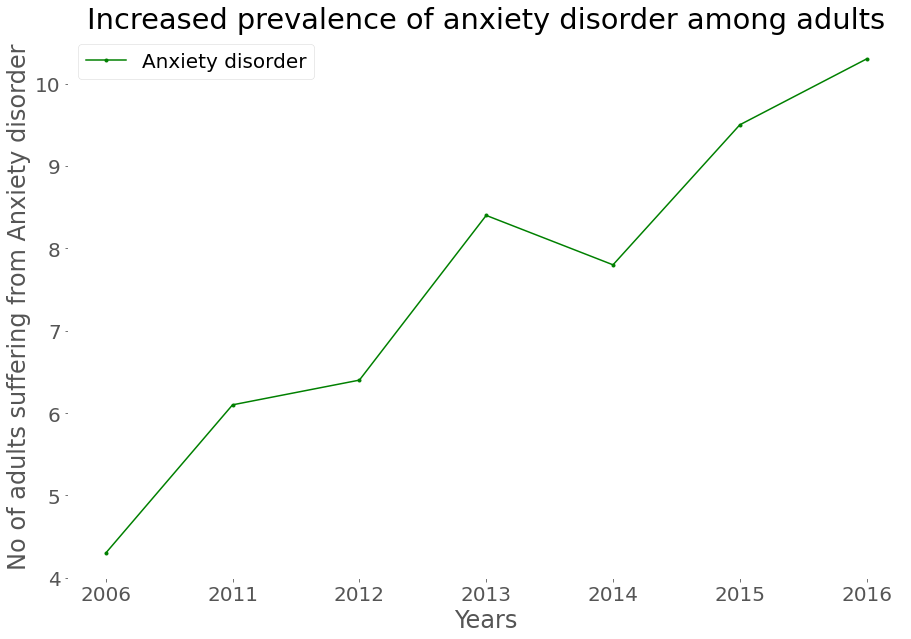

In [ ]:
anxiety_adults=wrangling('adults','Total',['Anxiety disorder'])
print(anxiety_adults)
ax=anxiety_adults.dropna().plot(color='green',label='Anxiety disorder in adults',style='.-')
ax.set_ylabel("No of adults suffering from Anxiety disorder")
ax.set_xlabel("Years")
plt.title("Increased prevalence of anxiety disorder among adults")
plt.legend(loc=2)

description  Anxiety disorder
Year                         
2006                      0.4
2007                      NaN
2011                      2.1
2012                      1.9
2013                      2.8
2014                      2.6
2015                      2.7
2016                      3.0


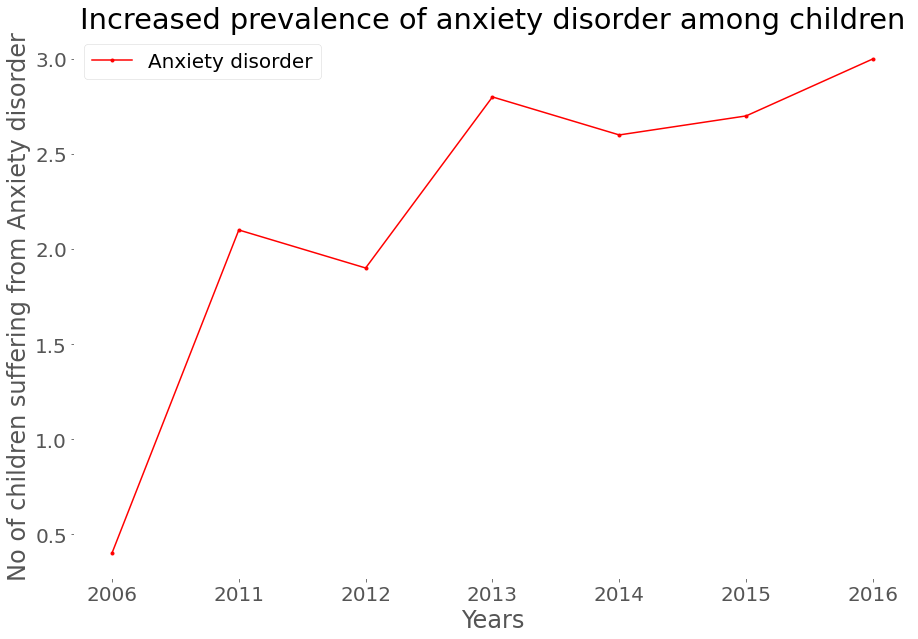

In [ ]:
anxiety_children=wrangling('children','Total',['Anxiety disorder'])
print(anxiety_children)
ax=anxiety_children.dropna().plot(color='red',label='Anxiety disorder in adults',style='.-')
ax.set_ylabel("No of children suffering from Anxiety disorder")
ax.set_xlabel("Years")
plt.title("Increased prevalence of anxiety disorder among children")
plt.legend(loc=2)

## Increased prevalence of anxiety disorder
To best display the results, it is better to combine them. The plot below depicts the increased prevalence of anxiety disorder among adults and children. The data reveals that in the past year, rates of anxiety disorder were higher for adults than for children. Furthermore, anxiety disorder cases have increased more rapidly among adults compared to children. In 2006, the rate was only 4.3, which increased to 10.3 by the end of 2016. In contrast, the cases among children in 2006 were at 0.4 and reached 3.0 in 2016.

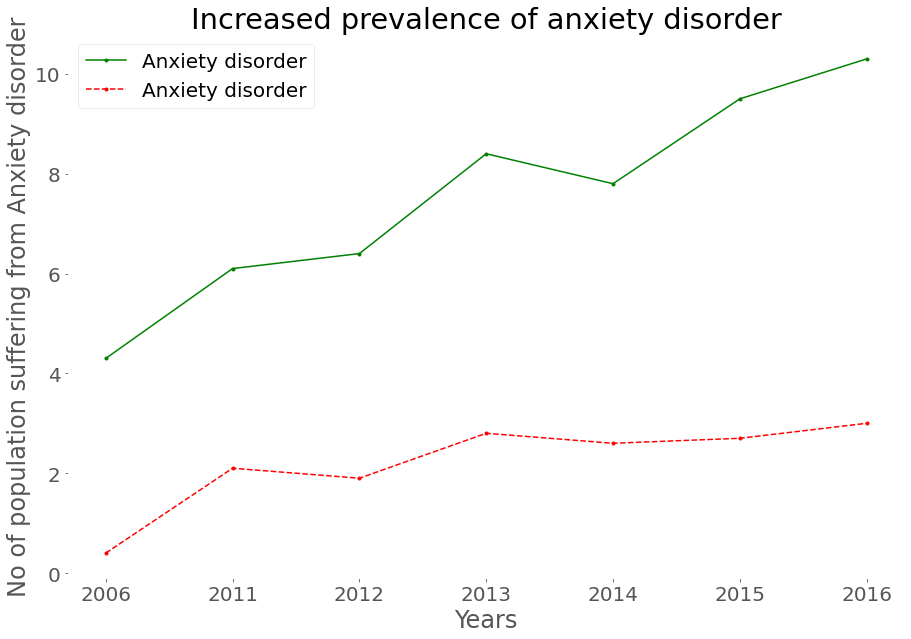

In [ ]:

ax = anxiety_adults.dropna().plot(color='green',label='Anxiety disorder in adults',style='.-')
ax=anxiety_children.dropna().plot(ax=ax, linestyle="--",color='red',label='Anxiety disorder in children',style='.-')
ax.set_ylabel("No of population suffering from Anxiety disorder")
ax.set_xlabel("Years")
plt.title("Increased prevalence of anxiety disorder")
plt.legend(loc=2)
plt.show()

## Smoking trend in New Zealand
The plot presents an interesting fact: an increased ratio of current, daily, and heavy smokers was expected, but it can be seen that every year the smoking rates are decreasing. In 2006, the highest rate was reported, and then this ratio gradually decreased. As shown below, more smokers in New Zealand have quit smoking in the last several years. One reason behind this trend could be an increase in tobacco prices.

On the other hand, the ratio of those who mostly smoke both manufactured and roll-your-own cigarettes fluctuates each year. One possible reason could be that smokers are coping with the increase in prices.


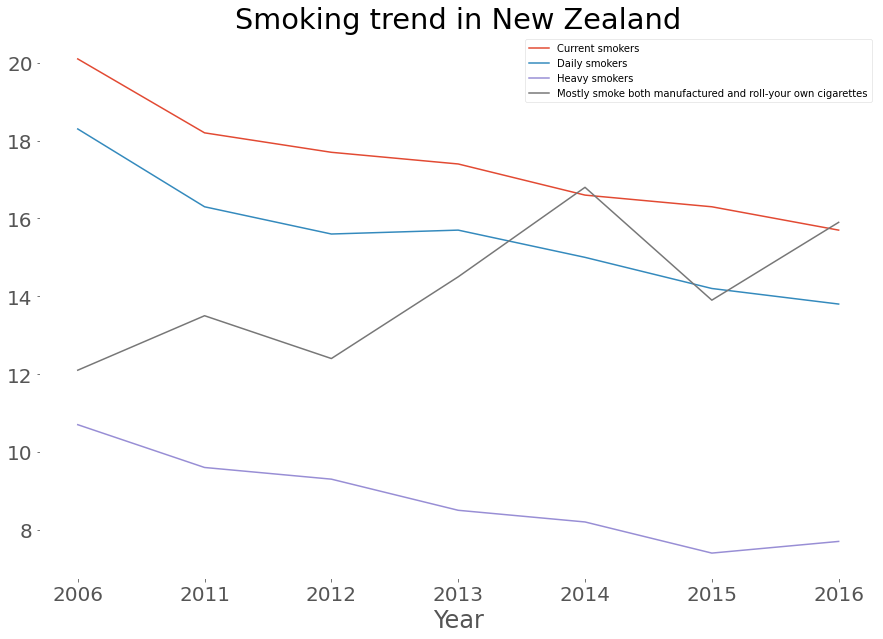

In [ ]:
smoker_labels = [
    'Heavy smokers',
    'Current smokers',
    'Daily smokers',
    'Mostly smoke both manufactured and roll-your own cigarettes'
]
smoking_trend=wrangling('adults','Total',smoker_labels).dropna().plot()
smoking_trend.plot()
plt.legend(loc=1, prop={'size':10})
plt.xlabel="Years"
plt.ylabel="Smokers ratio"
plt.title('Smoking trend in New Zealand')
plt.show()



## Conclusion

This report aims to answer some questions that may provide important information about the healthy lifestyle of the New Zealand population.

The data spans from 2006 to 2016 and was consistently found. It was gathered from different groups of adults and children, each displaying varying health description ratios.

In the report, three main questions are addressed. First, the anxiety order ratio among adults is observed to be greater than that among children, and this ratio gradually increases over the years. These increasing ratios may be influenced by various factors such as life experiences and environments.

Secondly, the report addresses the smoking rate. Interestingly, the findings differ from the initial hypothesis. Contrary to expectations of increased cases, the rate of smokers has actually decreased.

In conclusion, this survey report illustrates the health patterns of New Zealand. It reveals several interesting factors that warrant further analysis.
